# WhaleCo Streaming Analysis

Arpita Singh

# Data Cleaning and Data Preprocessing

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
members_df=pd.read_excel(r"C:\Users\ARPITA SINGH\Desktop\WhaleCo_Members_CS.xlsx",sheet_name='Customers') #reading the dataset with  the help of pandas 

In [89]:
members_df

,customer_id,Address,State,zip_code,first_name,last_name,email,Occupation,found_salary,internal_rank,sub_date,unsub_date,months_subbed,sub_unsub,active_months
0,WhaleCo509770,"798, Cedar Crossing, Walnutridge Road",WA,56026,Evelyn,Diaz,ediaz@whaleco.com,Journalist,45000,Bronze_Member,2024-02-15,NaN,NaN,Subscribed,1.0
1,WhaleCo744205,"34, Chestnut Glen, Oak Grove",PA,62065,Mason,White,mwhite@whaleco.com,Event Planner,45000,Bronze_Member,2024-01-28,NaN,NaN,Subscribed,2.0
2,WhaleCo332440,"915, Sycamore Road, Maple Lane",KY,12617,Eleanor,Williams,ewilliams@whaleco.com,Construction Worker,55000,Bronze_Member,2023-11-02,NaN,NaN,Subscribed,5.0
3,WhaleCo792248,"463, Elm Crossing, Cherry Lane",IL,78245,Sofia,White,swhite@whaleco.com,Automotive Technician,55000,Bronze_Member,2023-02-11,NaN,NaN,Subscribed,14.0
4,WhaleCo841154,"916, Parkside Boulevard, Dogwoodvale Street",VA,54556,Charlotte,Mitchell,cmitchell@whaleco.com,Photographer,45000,Bronze_Member,2023-09-26,NaN,NaN,Subscribed,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,WhaleCo643188,"532, Pine Street, Magnolia Street",VA,49274,Emily,Andrade,eandrade@whaleco.com,Pharmacist,55000,Bronze_Member,2023-12-26,NaN,NaN,Subscribed,3.0
5996,WhaleCo938206,"55, Pine View, Walnutridge Road",AL,68487,Alexander,Burgos,aburgos@whaleco.com,Public Relations Specialist,100000,Silver_Member,2023-08-12,NaN,NaN,Subscribed,7.0
5997,WhaleCo565380,"513, Hawthornhill Lane, Juniper Avenue",IA,24228,Jacob,Rodriguez,jrodriguez@whaleco.com,Public Relations Specialist,45000,Bronze_Member,2023-09-29,NaN,NaN,Subscribed,6.0
5998,WhaleCo112059,"266, Pinecrest Place, Birch Circle",VT,32665,Leah,White,lwhite@whaleco.com,Social Worker,45000,Bronze_Member,2023-08-26,NaN,NaN,Subscribed,7.0


In [90]:
members_df.info()#information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    6000 non-null   object        
 1   Address        6000 non-null   object        
 2   State          6000 non-null   object        
 3   zip_code       6000 non-null   int64         
 4   first_name     6000 non-null   object        
 5   last_name      6000 non-null   object        
 6   email          6000 non-null   object        
 7   Occupation     6000 non-null   object        
 8   found_salary   6000 non-null   int64         
 9   internal_rank  6000 non-null   object        
 10  sub_date       6000 non-null   datetime64[ns]
 11  unsub_date     388 non-null    object        
 12  months_subbed  389 non-null    float64       
 13  sub_unsub      5983 non-null   object        
 14  active_months  5611 non-null   float64       
dtypes: datetime64[ns](1),

In [91]:
members_df.shape #checking the shape of dataset

(6000, 15)

In [92]:
members_df.columns #checking coulums of the dataset

Index(['customer_id', 'Address', 'State', 'zip_code', 'first_name',
       'last_name', 'email', 'Occupation', 'found_salary', 'internal_rank',
       'sub_date', 'unsub_date', 'months_subbed', 'sub_unsub',
       'active_months'],
      dtype='object')

In [93]:
members_df=members_df.drop(columns=['Address','first_name','zip_code','last_name','email','sub_date','unsub_date','']) # dropping unnecessary  features

In [94]:
members_df.columns #refreshing the columns of dataset

Index(['customer_id', 'State', 'Occupation', 'found_salary', 'internal_rank',
       'sub_unsub', 'active_months'],
      dtype='object')

In [95]:
members_df.isnull().sum()#checking the null values in dataset

customer_id        0
State              0
Occupation         0
found_salary       0
internal_rank      0
sub_unsub         17
active_months    389
dtype: int64

In [96]:
members_df['sub_unsub'] = members_df['sub_unsub'].fillna('Not Available')# filling missing values with "Not Availabel"
members_df['active_months'].fillna(members_df['active_months'].median(), inplace=True) #handling the null value with imputation of median

In [97]:
members_df.isnull().sum()

customer_id      0
State            0
Occupation       0
found_salary     0
internal_rank    0
sub_unsub        0
active_months    0
dtype: int64

In [14]:
members_df.describe() #statistical summary of dataset

,found_salary,active_months
count,6000.000000,6000.000000
mean,70132.500000,7.316000
std,28801.762689,4.215618
min,45000.000000,0.000000
25%,45000.000000,4.000000
50%,55000.000000,7.000000
75%,85000.000000,11.000000
max,140000.000000,15.000000


In [15]:
orders_df=pd.read_excel(r"C:\Users\ARPITA SINGH\Desktop\WhaleCo_Orders_CS.xlsx") #reading orders dataset

In [16]:
orders_df

,customer_id,ord_number,product_name,Price,OSAT_Score,NPS_Score,streams_per_month,hours_viewed,internal_accounts
0,WhaleCo851582,Ord893028-987374,WhaleCo VIP,150.0,6.0,6.0,277.0,143.216667,5.0
1,WhaleCo468440,Ord658712-282253,WhaleCo Pay as you Go Package,5.0,6.0,8.0,130.0,34.983333,5.0
2,WhaleCo264909,Ord704267-830194,WhaleCo Extra,35.0,6.0,9.0,132.0,125.750000,2.0
3,WhaleCo440254,Ord475039-656499,WhaleCo Exclusive,10.0,6.0,6.0,253.0,130.050000,2.0
4,WhaleCo490763,Ord801385-680903,WhaleCo Prime,120.0,7.0,9.0,166.0,68.416667,1.0
...,...,...,...,...,...,...,...,...,...
49995,WhaleCo600508,Ord564863-474170,WhaleCo Pay as you Go Package,5.0,8.0,8.0,209.0,99.100000,3.0
49996,WhaleCo437918,Ord250141-235246,WhaleCo Prime,120.0,8.0,9.0,126.0,8.816667,2.0
49997,WhaleCo842958,Ord759441-960450,WhaleCo Hardwood Package (NBA),65.0,7.0,6.0,118.0,27.516667,5.0
49998,WhaleCo597785,Ord946778-469758,WhaleCo Exclusive,10.0,6.0,6.0,15.0,111.433333,1.0


In [17]:
orders_df.info() #information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        50000 non-null  object 
 1   ord_number         50000 non-null  object 
 2   product_name       50000 non-null  object 
 3   Price              49960 non-null  float64
 4   OSAT_Score         49998 non-null  float64
 5   NPS_Score          49994 non-null  float64
 6   streams_per_month  49980 non-null  float64
 7   hours_viewed       49971 non-null  float64
 8   internal_accounts  49994 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [18]:
orders_df.shape #cheking the dataset shape

(50000, 9)

In [19]:
orders_df.columns #colums of the dataset

Index(['customer_id', 'ord_number', 'product_name', 'Price', 'OSAT_Score',
       'NPS_Score', 'streams_per_month', 'hours_viewed', 'internal_accounts'],
      dtype='object')

In [20]:
orders_df.isnull().sum() #checking null value in the data

customer_id           0
ord_number            0
product_name          0
Price                40
OSAT_Score            2
NPS_Score             6
streams_per_month    20
hours_viewed         29
internal_accounts     6
dtype: int64

In [21]:
orders_df['Price'].fillna(orders_df['Price'].median,inplace=True)#imputing median for missing values
orders_df['OSAT_Score'].fillna(orders_df['OSAT_Score'].mode,inplace=True)#imputing missing values with mode
orders_df['NPS_Score'].fillna(orders_df['NPS_Score'].mode,inplace=True)#imputing missing values with mode
orders_df['streams_per_month'].fillna(orders_df['streams_per_month'].mean,inplace=True)#imputing missing values with mean
orders_df['hours_viewed'].fillna(orders_df['hours_viewed'].mean,inplace=True)#imputing missing values with mean
orders_df['internal_accounts'].fillna(orders_df['internal_accounts'].mean,inplace=True)#imputing missing values with mean

In [22]:
orders_df.isnull().sum()

customer_id          0
ord_number           0
product_name         0
Price                0
OSAT_Score           0
NPS_Score            0
streams_per_month    0
hours_viewed         0
internal_accounts    0
dtype: int64

In [23]:
orders_df.describe()

,customer_id,ord_number,product_name,Price,OSAT_Score,NPS_Score,streams_per_month,hours_viewed,internal_accounts
count,50000,50000,50000,50000.0,50000.0,50000.0,50000.0,50000,50000.0
unique,5975,50000,23,22.0,5.0,5.0,301.0,13423,8.0
top,WhaleCo131891,Ord893028-987374,WhaleCo Online Gaming Streaming Package,25.0,8.0,9.0,261.0,<bound method NDFrame._add_numeric_operations....,7.0
freq,25,1,2247,4400.0,18503.0,18622.0,197.0,29,7270.0


In [26]:
packages_df=pd.read_excel(r"C:\Users\ARPITA SINGH\Desktop\WhaleCo_Orders_CS.xlsx",sheet_name='Packages') #reading package sheet in orders table with help of pandas

In [27]:
packages_df

,product_name,Price,Index
0,WhaleCo Kids Premium Sub,25,1
1,WhaleCO 360 Office Premium,45,2
2,WhaleCo Babies & Tots Package,75,3
3,WhaleCo Prime,120,4
4,WhaleCo Plus,30,5
5,WhaleCo Unlimited Streaming,200,6
6,WhaleCo Now Unlimted Radio Package,20,7
7,WhaleCo Online Gaming Streaming Package,180,8
8,WhaleCo Premium StockMarket Watch Package,450,9
9,WhaleCo All-Access,300,10


In [28]:
packages_df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  23 non-null     object
 1   Price         23 non-null     int64 
 2   Index         23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 680.0+ bytes


In [29]:
packages_df.shape

(23, 3)

In [30]:
packages_df.isnull().sum()

product_name    0
Price           0
Index           0
dtype: int64

In [31]:
packages_df.describe()

,Price,Index
count,23.000000,23.00000
mean,100.869565,12.00000
std,103.755089,6.78233
min,5.000000,1.00000
25%,32.500000,6.50000
50%,75.000000,12.00000
75%,117.500000,17.50000
max,450.000000,23.00000


Checking orders and packages columns to merge

In [32]:
packages_df.columns

Index(['product_name', 'Price ', 'Index'], dtype='object')

In [33]:
orders_df.columns

Index(['customer_id', 'ord_number', 'product_name', 'Price', 'OSAT_Score',
       'NPS_Score', 'streams_per_month', 'hours_viewed', 'internal_accounts'],
      dtype='object')

In [34]:
merged_df=pd.merge(orders_df,packages_df,on='product_name',how='left') #combining both orders and packages sheets as merged_df

In [35]:
merged_df

,customer_id,ord_number,product_name,Price,OSAT_Score,NPS_Score,streams_per_month,hours_viewed,internal_accounts,Price,Index
0,WhaleCo851582,Ord893028-987374,WhaleCo VIP,150.0,6.0,6.0,277.0,143.216667,5.0,150.0,15.0
1,WhaleCo468440,Ord658712-282253,WhaleCo Pay as you Go Package,5.0,6.0,8.0,130.0,34.983333,5.0,5.0,23.0
2,WhaleCo264909,Ord704267-830194,WhaleCo Extra,35.0,6.0,9.0,132.0,125.75,2.0,35.0,20.0
3,WhaleCo440254,Ord475039-656499,WhaleCo Exclusive,10.0,6.0,6.0,253.0,130.05,2.0,10.0,21.0
4,WhaleCo490763,Ord801385-680903,WhaleCo Prime,120.0,7.0,9.0,166.0,68.416667,1.0,120.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,WhaleCo600508,Ord564863-474170,WhaleCo Pay as you Go Package,5.0,8.0,8.0,209.0,99.1,3.0,5.0,23.0
49996,WhaleCo437918,Ord250141-235246,WhaleCo Prime,120.0,8.0,9.0,126.0,8.816667,2.0,120.0,4.0
49997,WhaleCo842958,Ord759441-960450,WhaleCo Hardwood Package (NBA),65.0,7.0,6.0,118.0,27.516667,5.0,65.0,17.0
49998,WhaleCo597785,Ord946778-469758,WhaleCo Exclusive,10.0,6.0,6.0,15.0,111.433333,1.0,10.0,21.0


In [36]:
merged_df.shape

(50000, 11)

In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        50000 non-null  object 
 1   ord_number         50000 non-null  object 
 2   product_name       50000 non-null  object 
 3   Price              50000 non-null  object 
 4   OSAT_Score         50000 non-null  object 
 5   NPS_Score          50000 non-null  object 
 6   streams_per_month  50000 non-null  object 
 7   hours_viewed       50000 non-null  object 
 8   internal_accounts  50000 non-null  object 
 9   Price              45684 non-null  float64
 10  Index              45684 non-null  float64
dtypes: float64(2), object(9)
memory usage: 4.6+ MB


In [39]:
merged_df.head(2)

,customer_id,ord_number,product_name,OSAT_Score,NPS_Score,streams_per_month,hours_viewed,internal_accounts,Price,Index
0,WhaleCo851582,Ord893028-987374,WhaleCo VIP,6.0,6.0,277.0,143.216667,5.0,150.0,15.0
1,WhaleCo468440,Ord658712-282253,WhaleCo Pay as you Go Package,6.0,8.0,130.0,34.983333,5.0,5.0,23.0


In [40]:
merged_df.isnull().sum()

customer_id             0
ord_number              0
product_name            0
OSAT_Score              0
NPS_Score               0
streams_per_month       0
hours_viewed            0
internal_accounts       0
Price                4316
Index                4316
dtype: int64

In [41]:
merged_df['Price '] = merged_df['Price '].fillna(merged_df['Price '].median()) #handlinh the null value in the data while imputation
merged_df['Index'] = merged_df['Index'].fillna(-1)

In [42]:
merged_df.isnull().sum()

customer_id          0
ord_number           0
product_name         0
OSAT_Score           0
NPS_Score            0
streams_per_month    0
hours_viewed         0
internal_accounts    0
Price                0
Index                0
dtype: int64

Now for final merge checking merge_df column and member_df column 

In [44]:
members_df.columns

Index(['customer_id', 'State', 'Occupation', 'found_salary', 'internal_rank',
       'sub_unsub', 'active_months'],
      dtype='object')

In [45]:
merged_df.columns

Index(['customer_id', 'ord_number', 'product_name', 'OSAT_Score', 'NPS_Score',
       'streams_per_month', 'hours_viewed', 'internal_accounts', 'Price ',
       'Index'],
      dtype='object')

In [46]:
merged_df.rename(columns={'Customer_id':'customer_id'},inplace=True)# renaming the Custormer_id with suitable feature

In [229]:
final_df=pd.merge(members_df,merged_df, on='customer_id', how='left') #combining final dataset with members and merged_df

In [230]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50408 entries, 0 to 50407
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        50408 non-null  object 
 1   State              50408 non-null  object 
 2   Occupation         50408 non-null  object 
 3   found_salary       50408 non-null  int64  
 4   internal_rank      50408 non-null  object 
 5   sub_unsub          50408 non-null  object 
 6   active_months      50408 non-null  float64
 7   ord_number         50406 non-null  object 
 8   product_name       50406 non-null  object 
 9   OSAT_Score         50406 non-null  object 
 10  NPS_Score          50406 non-null  object 
 11  streams_per_month  50406 non-null  object 
 12  hours_viewed       50406 non-null  object 
 13  internal_accounts  50406 non-null  object 
 14  Price              50406 non-null  float64
 15  Index              50406 non-null  float64
dtypes: float64(3), int64(1

In [231]:
final_df.isnull().sum() #checking null value in the data

customer_id          0
State                0
Occupation           0
found_salary         0
internal_rank        0
sub_unsub            0
active_months        0
ord_number           2
product_name         2
OSAT_Score           2
NPS_Score            2
streams_per_month    2
hours_viewed         2
internal_accounts    2
Price                2
Index                2
dtype: int64

In [232]:
final_df.dropna(inplace=True) #removing null value 

In [233]:
final_df.isnull().sum()

customer_id          0
State                0
Occupation           0
found_salary         0
internal_rank        0
sub_unsub            0
active_months        0
ord_number           0
product_name         0
OSAT_Score           0
NPS_Score            0
streams_per_month    0
hours_viewed         0
internal_accounts    0
Price                0
Index                0
dtype: int64

In [234]:
# Checking the number of unique values in each column
unique_values = final_df.nunique()
unique_values

customer_id           5974
State                   50
Occupation              50
found_salary            10
internal_rank           10
sub_unsub                3
active_months           16
ord_number           49988
product_name            23
OSAT_Score               5
NPS_Score                5
streams_per_month      301
hours_viewed         13423
internal_accounts        8
Price                   19
Index                   22
dtype: int64

Now my data is validate and ready to analysis

# EDA (Exploratory Data Analysis)

Task-1Customer Demographics

Text(0.5, 1.0, 'Distribution of Customers Across States')

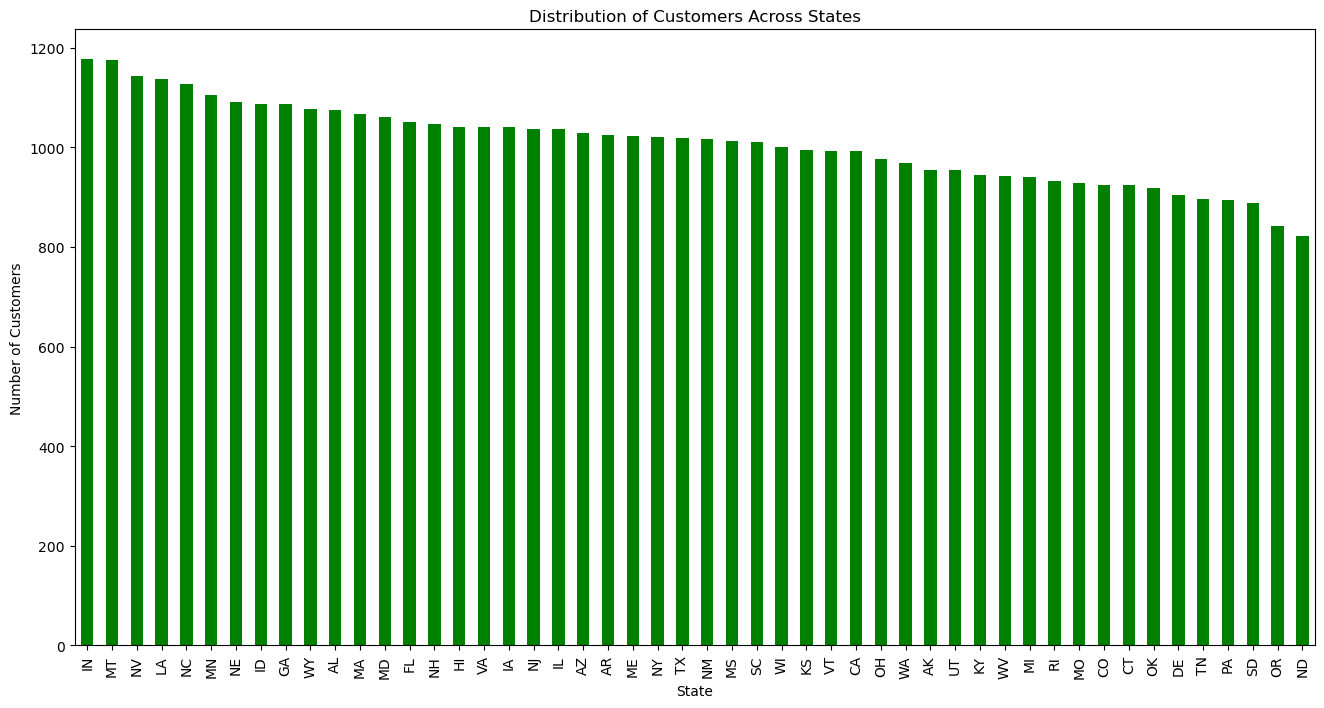

In [235]:
#Distribution of Customers Across States
plt.figure(figsize=(16,8))
final_df['State'].value_counts().plot(kind='bar', color='green')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across States')


Observation:The bar chart shows the number of customers in each state. State IN, MT has the highest number of customers, followed by State LA and NC. States OR and ND have relatively fewer customers compared to other states.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Chef'),
  Text(1, 0, 'Graphic Designer'),
  Text(2, 0, 'Logistics Manager'),
  Text(3, 0, 'Automotive Technician'),
  Text(4, 0, 'Environmental Scientist'),
  Text(5, 0, 'Accountant'),
  Text(6, 0, 'Administrative Assistant'),
  Text(7, 0, 'Journalist'),
  Text(8, 0, 'Teacher'),
  Text(9, 0, 'Paramedic'),
  Text(10, 0, 'Veterinarian'),
  Text(11, 0, 'Sales Representative'),
  Text(12, 0, 'Lawyer'),
  Text(13, 0, 'Librarian'),
  Text(14, 0, 'Musician'),
  Text(15, 0, 'Market Research Analyst'),
  Text(16, 0, 'Nutritionist'),
  Text(17, 0, 'Project Manager'),
  Text(18, 0, 'Real Estate Agent'),
  Text(19, 0, 'Mechanical Engineer'),
  Text(20, 0, 'Public Relations Specialist'),
  Text(21, 0, 'Architect'),
  Text(22, 0, 'Construction Worker'),
  Text(23,

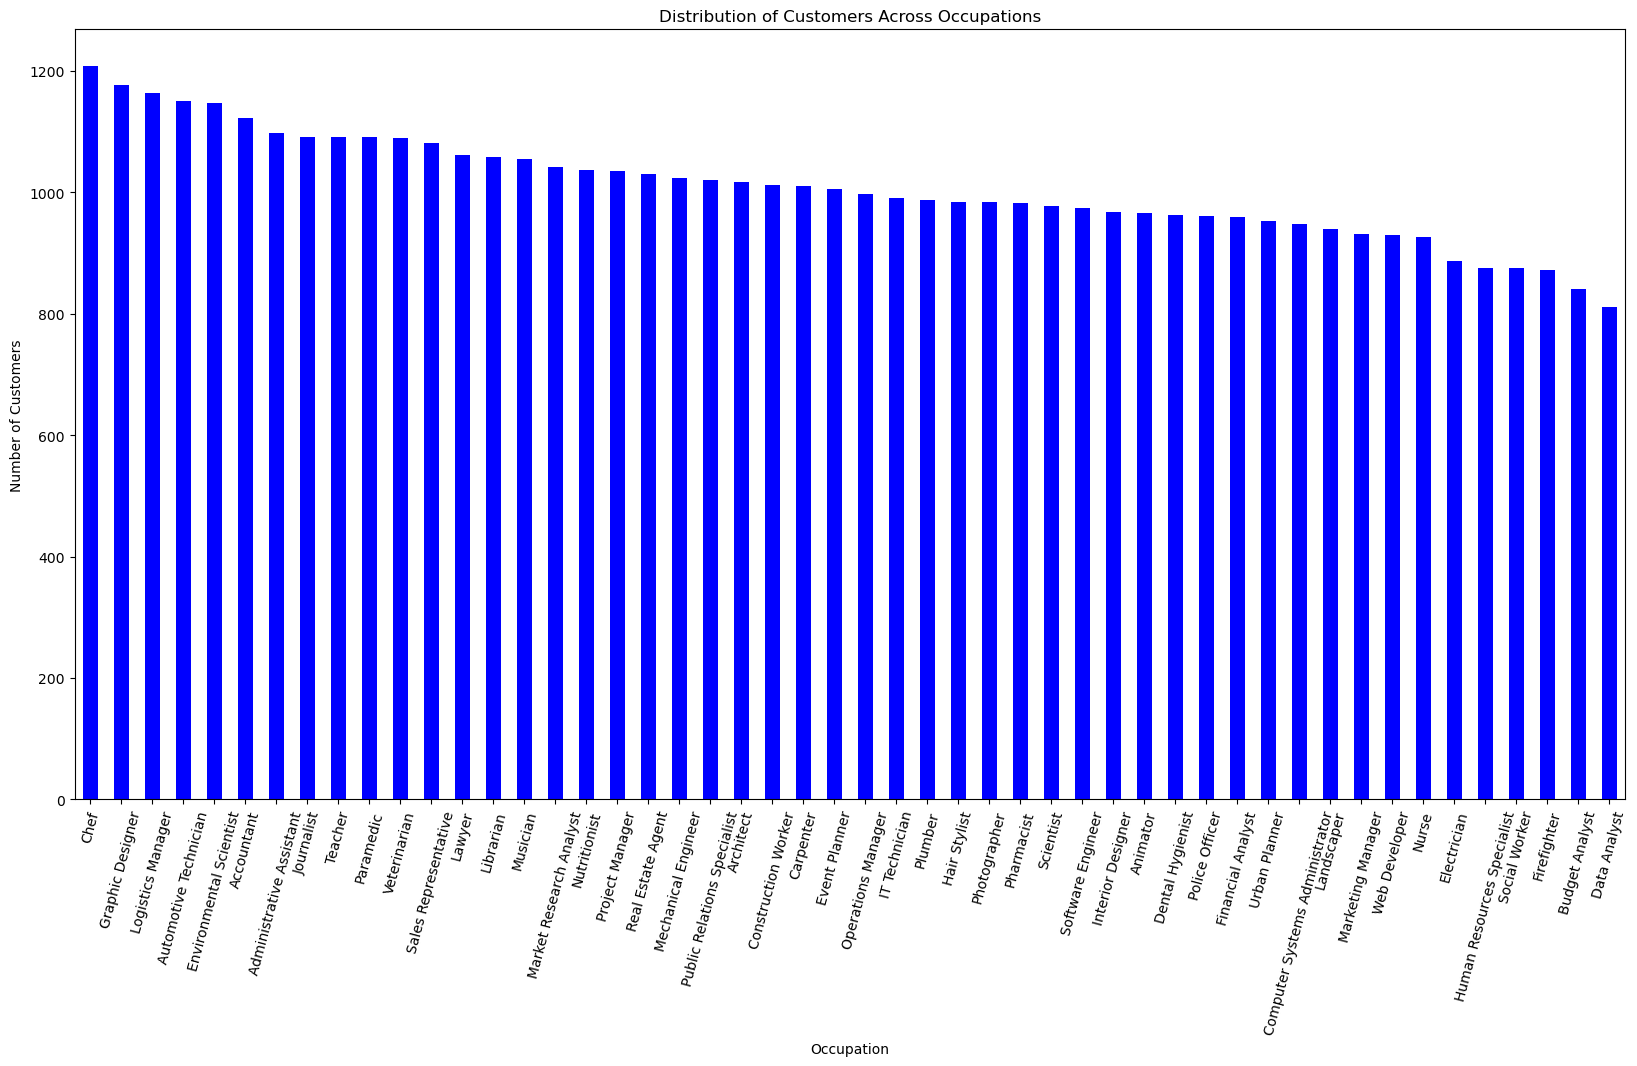

In [293]:
#Distribution of Customers Across Occupations
plt.figure(figsize=(20,10))
final_df['Occupation'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Occupations')
plt.xticks(rotation=75)

Observation:The bar chart displays the number of customers in each occupation category. Occupation chef has the highest number of customers. Occupations Business analyst and data analyst have relatively fewer customers compared to other occupations

Text(0.5, 1.0, 'Distribution of Customers Across Salary Ranges')

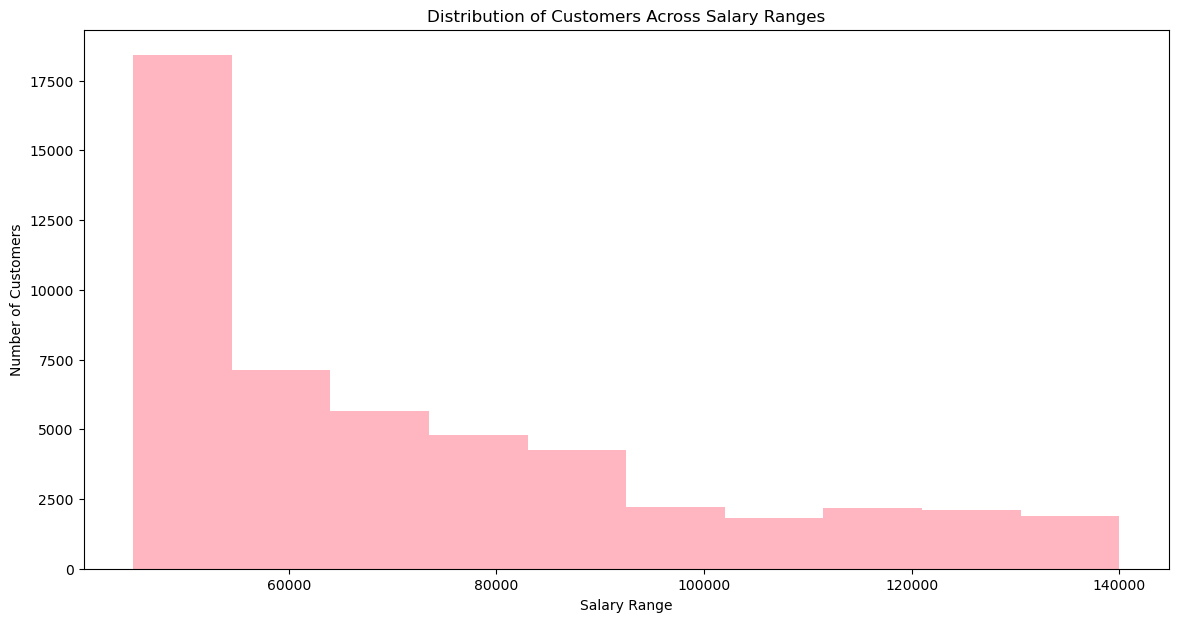

In [237]:
#Distribution of Customers Across Salary Ranges
plt.figure(figsize=(14,7))
plt.hist(final_df['found_salary'], bins=10, color='lightpink')
plt.xlabel('Salary Range')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Salary Ranges')

Observation:The histogram shows the distribution of customers based on their salary ranges. Most customers fall into the salary range of 60000. There are fewer customers in the higher salary ranges above 100000

Task-2. Product Performance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'WhaleCo First Tv Package (For K12 Students ONLY)'),
  Text(1, 0, 'WhaleCo Premium StockMarket Watch Package'),
  Text(2, 0, 'WhaleCo Kids Premium Sub'),
  Text(3, 0, 'WhaleCO 360 Office Premium'),
  Text(4, 0, 'WhaleCo Plus'),
  Text(5, 0, 'WhaleCo Outdoor & Adventure Advantage Package'),
  Text(6, 0, 'WhaleCo Exclusive'),
  Text(7, 0, 'WhaleCo Boost Cellular Plan & Internet'),
  Text(8, 0, 'WhaleCo Choice'),
  Text(9, 0, 'WhaleCo Now Unlimted Radio Package'),
  Text(10, 0, 'WhaleCo All-Access'),
  Text(11, 0, 'WhaleCo Prime'),
  Text(12, 0, 'WhaleCo Extra'),
  Text(13, 0, 'WhaleCo Other Sports Package'),
  Text(14, 0, 'WhaleCo VIP'),
  Text(15, 0, 'WhaleCo Unlimited Streaming'),
  Text(16, 0, 'WhaleCo Online Gaming Streaming Package'),
  Text(17, 0, 'WhaleCo Sunday Ticket (NFL)'),
  Text(18, 0, 'WhaleCo Pay as you Go Package'),
  Text(19, 0, 'WhaleCo Babies & Tot

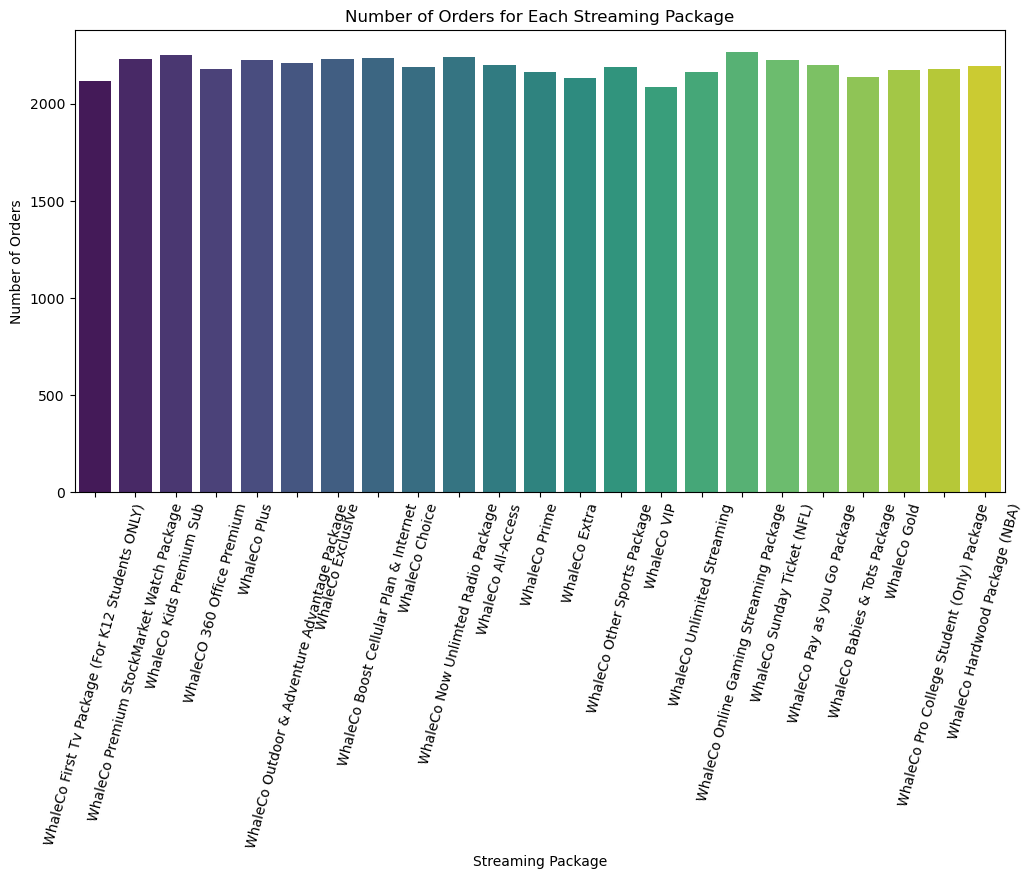

In [238]:
#Identify the Most Popular Streaming Packages
plt.figure(figsize=(12,6))
sns.countplot(x='product_name', data=final_df, palette='viridis')
plt.xlabel('Streaming Package')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Streaming Package')
plt.xticks(rotation=75)

Observation: Most popular streaming packages is WhaleCo Unlimited Streaming

In [239]:
final_df['OSAT_Score'] = pd.to_numeric(final_df['OSAT_Score'], errors='coerce')#converting the dataype to numeric
final_df['NPS_Score']=pd.to_numeric(final_df['NPS_Score'],errors='coerce')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'WhaleCo First Tv Package (For K12 Students ONLY)'),
  Text(1, 0, 'WhaleCo Premium StockMarket Watch Package'),
  Text(2, 0, 'WhaleCo Kids Premium Sub'),
  Text(3, 0, 'WhaleCO 360 Office Premium'),
  Text(4, 0, 'WhaleCo Plus'),
  Text(5, 0, 'WhaleCo Outdoor & Adventure Advantage Package'),
  Text(6, 0, 'WhaleCo Exclusive'),
  Text(7, 0, 'WhaleCo Boost Cellular Plan & Internet'),
  Text(8, 0, 'WhaleCo Choice'),
  Text(9, 0, 'WhaleCo Now Unlimted Radio Package'),
  Text(10, 0, 'WhaleCo All-Access'),
  Text(11, 0, 'WhaleCo Prime'),
  Text(12, 0, 'WhaleCo Extra'),
  Text(13, 0, 'WhaleCo Other Sports Package'),
  Text(14, 0, 'WhaleCo VIP'),
  Text(15, 0, 'WhaleCo Unlimited Streaming'),
  Text(16, 0, 'WhaleCo Online Gaming Streaming Package'),
  Text(17, 0, 'WhaleCo Sunday Ticket (NFL)'),
  Text(18, 0, 'WhaleCo Pay as you Go Package'),
  Text(19, 0, 'WhaleCo Babies & Tot

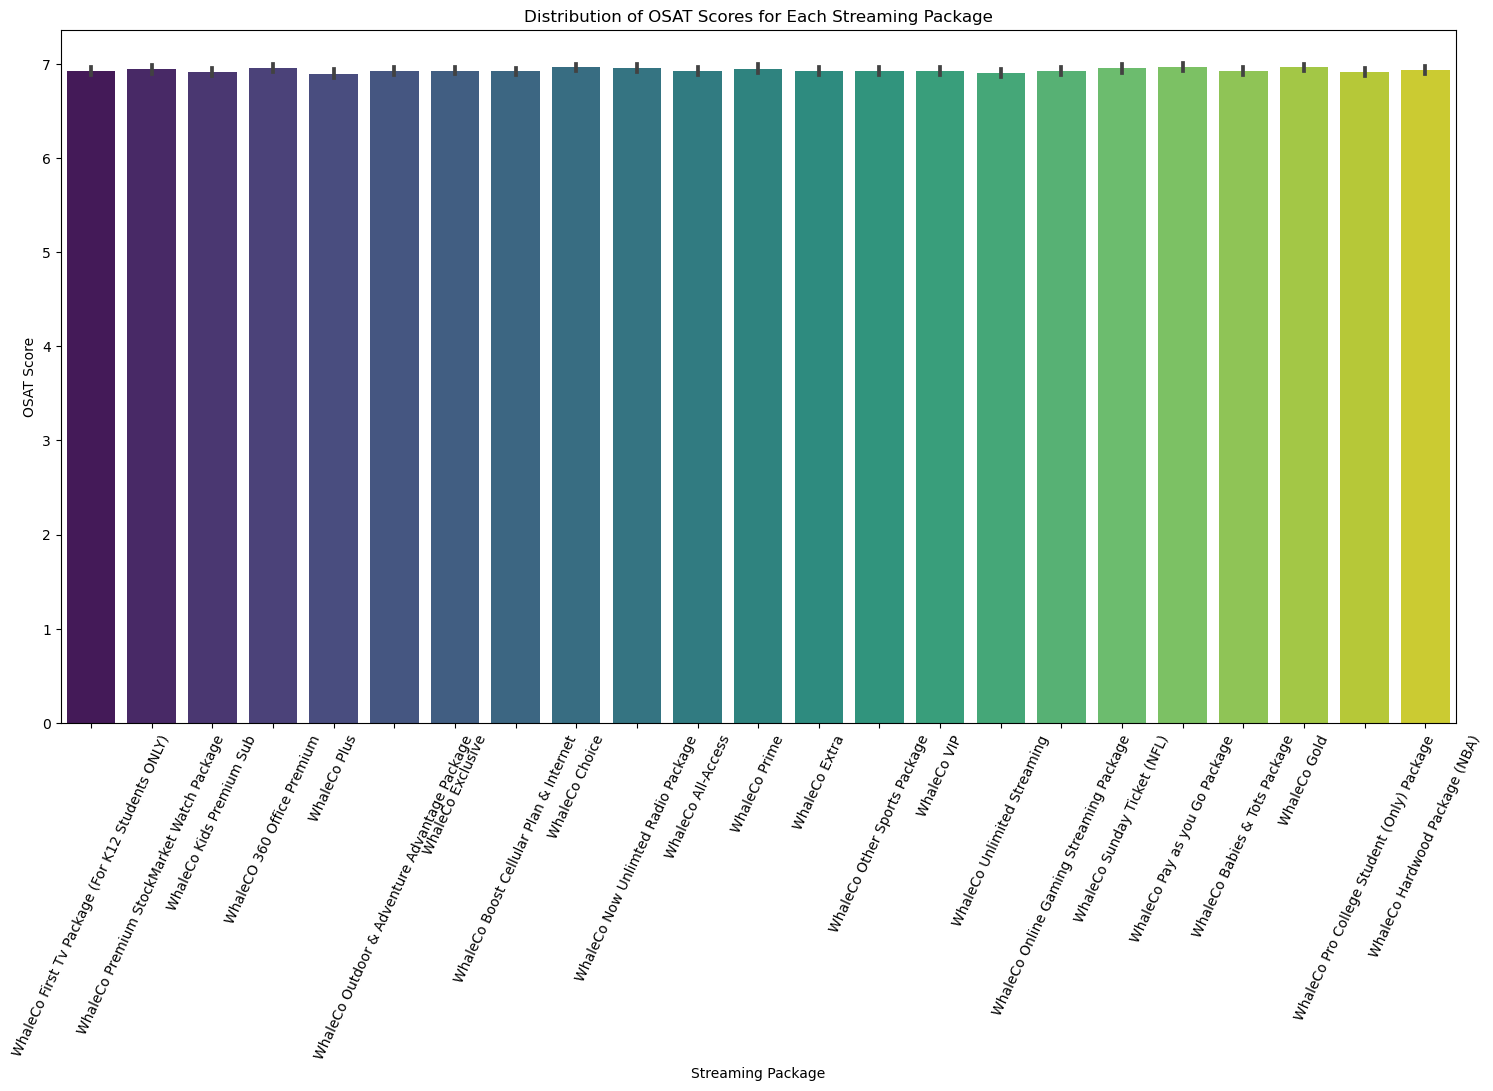

In [294]:
# Assess Customer Satisfaction Levels
plt.figure(figsize=(18,9))
sns.barplot(x='product_name', y='OSAT_Score', data=final_df, palette='viridis')
plt.xlabel('Streaming Package')
plt.ylabel('OSAT Score')
plt.title('Distribution of OSAT Scores for Each Streaming Package')
plt.xticks(rotation=65)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'WhaleCo First Tv Package (For K12 Students ONLY)'),
  Text(1, 0, 'WhaleCo Premium StockMarket Watch Package'),
  Text(2, 0, 'WhaleCo Kids Premium Sub'),
  Text(3, 0, 'WhaleCO 360 Office Premium'),
  Text(4, 0, 'WhaleCo Plus'),
  Text(5, 0, 'WhaleCo Outdoor & Adventure Advantage Package'),
  Text(6, 0, 'WhaleCo Exclusive'),
  Text(7, 0, 'WhaleCo Boost Cellular Plan & Internet'),
  Text(8, 0, 'WhaleCo Choice'),
  Text(9, 0, 'WhaleCo Now Unlimted Radio Package'),
  Text(10, 0, 'WhaleCo All-Access'),
  Text(11, 0, 'WhaleCo Prime'),
  Text(12, 0, 'WhaleCo Extra'),
  Text(13, 0, 'WhaleCo Other Sports Package'),
  Text(14, 0, 'WhaleCo VIP'),
  Text(15, 0, 'WhaleCo Unlimited Streaming'),
  Text(16, 0, 'WhaleCo Online Gaming Streaming Package'),
  Text(17, 0, 'WhaleCo Sunday Ticket (NFL)'),
  Text(18, 0, 'WhaleCo Pay as you Go Package'),
  Text(19, 0, 'WhaleCo Babies & Tot

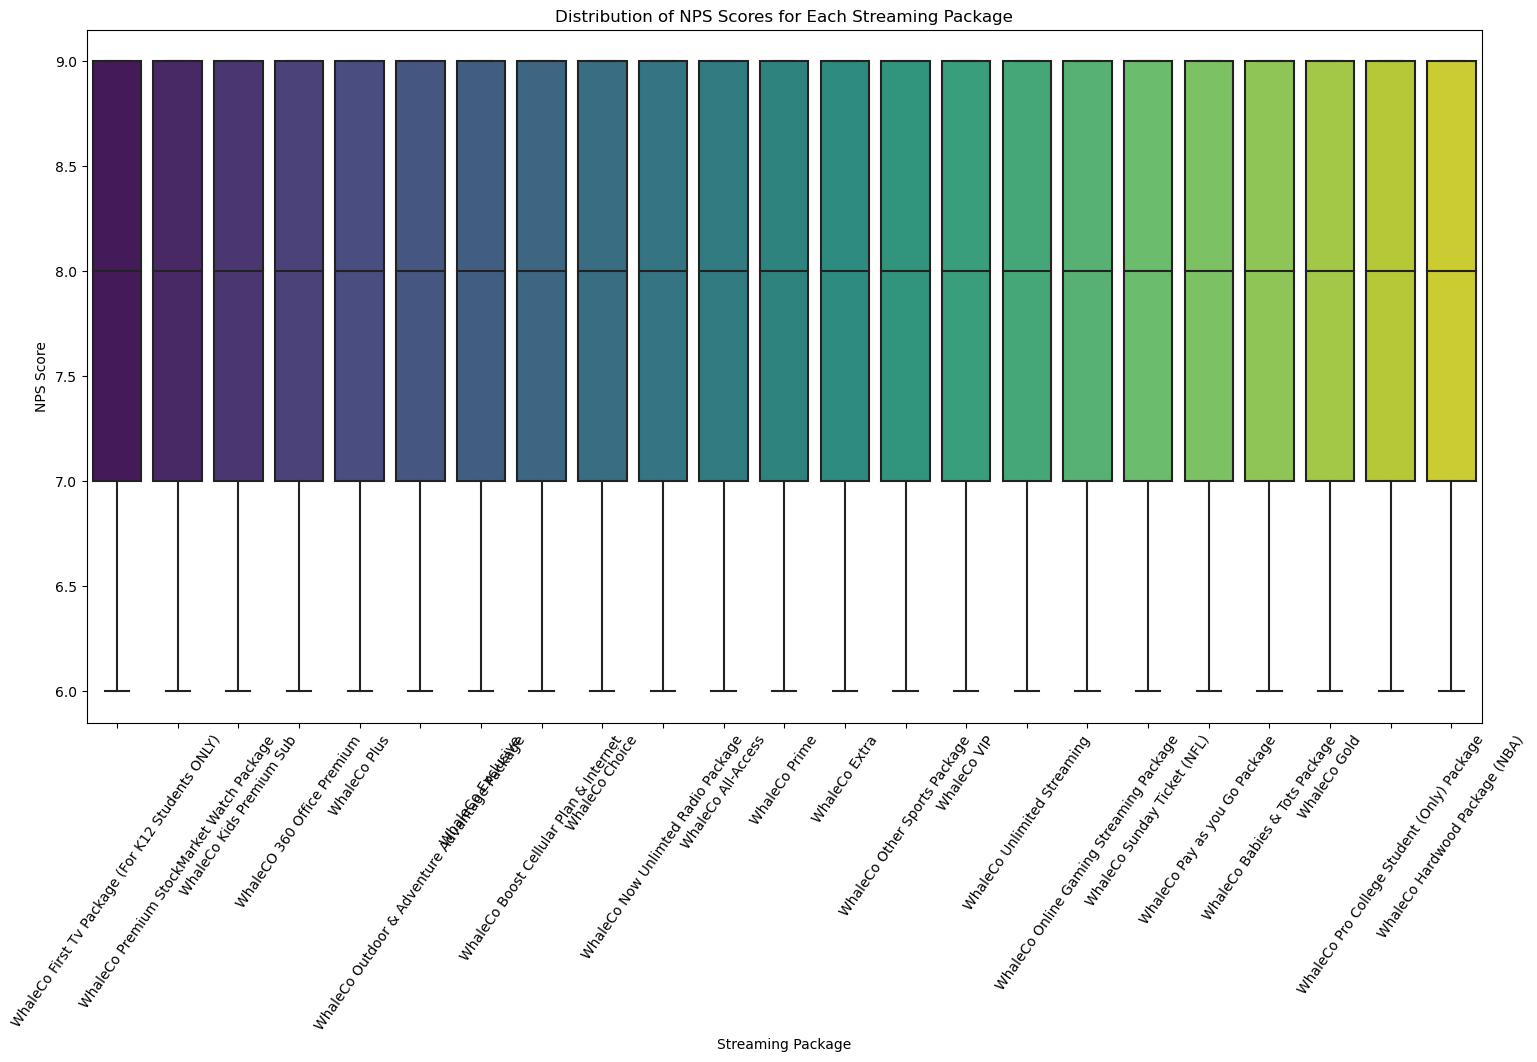

In [241]:
plt.figure(figsize=(18,9))
sns.boxplot(x='product_name', y='NPS_Score', data=final_df, palette='viridis')
plt.xlabel('Streaming Package')
plt.ylabel('NPS Score')
plt.title('Distribution of NPS Scores for Each Streaming Package')
plt.xticks(rotation=55)

Text(0.5, 1.0, 'Relationship Between Price and Hours Viewed')

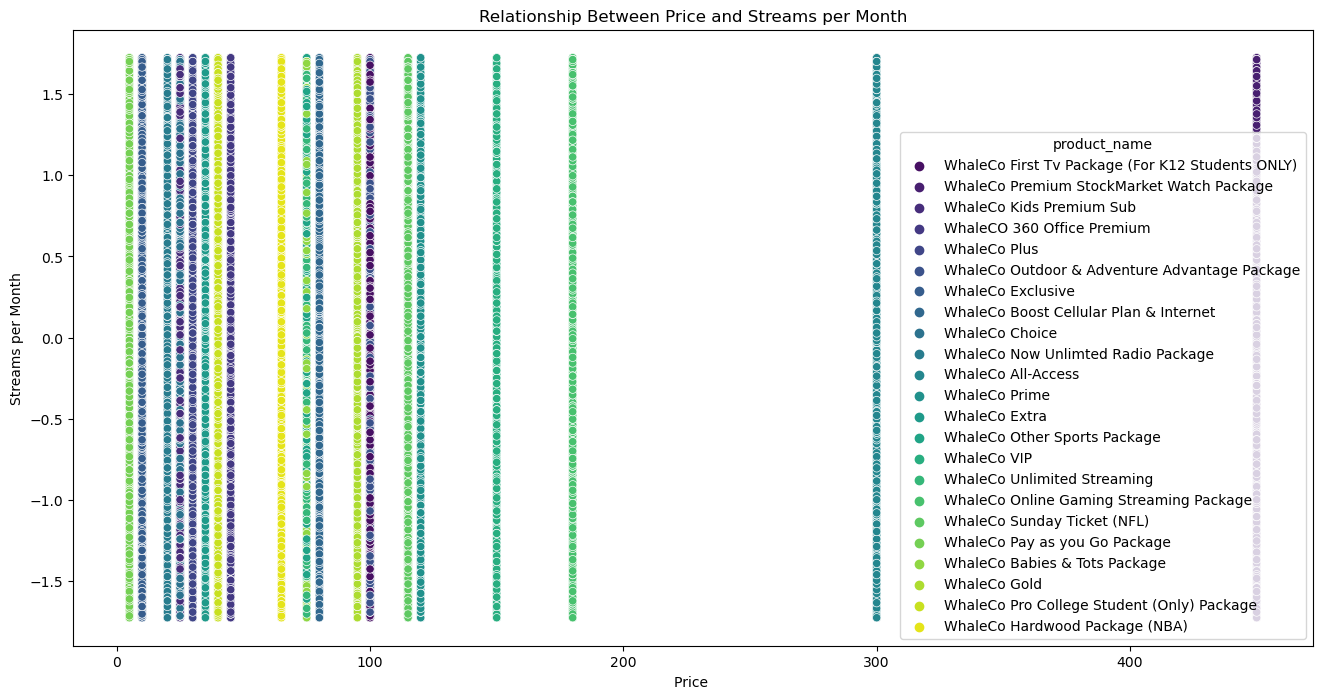

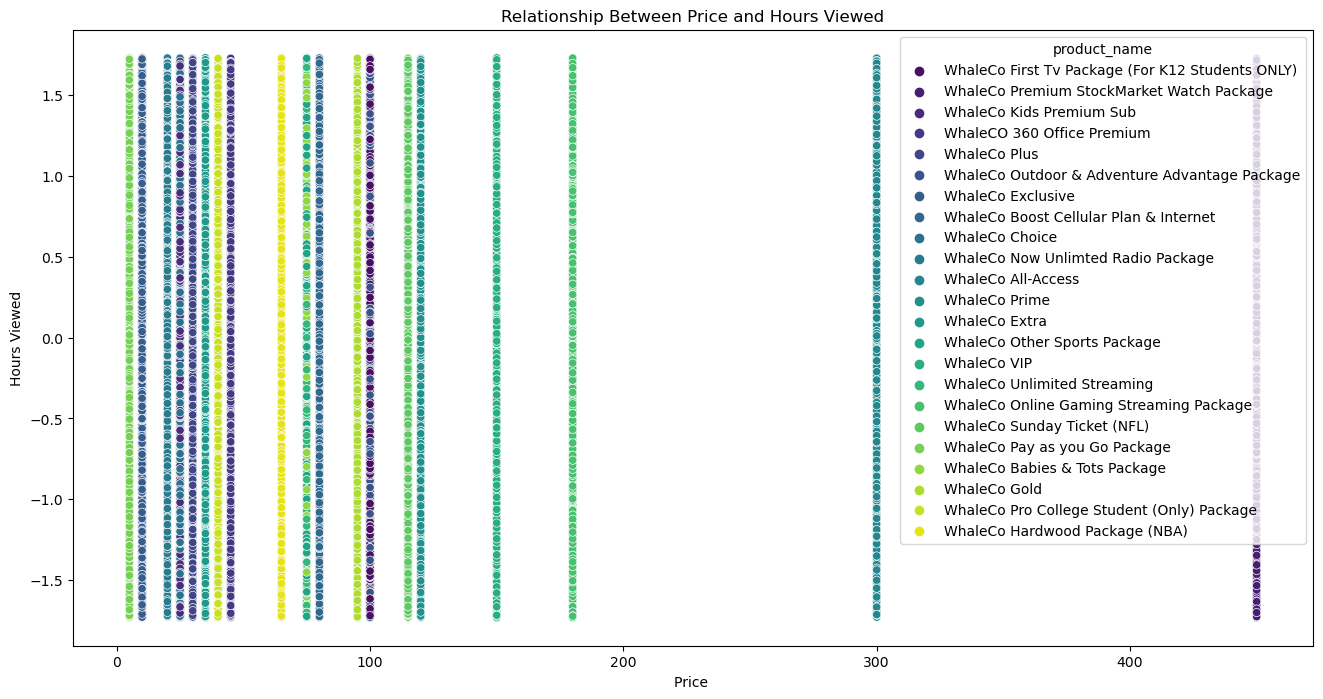

In [295]:
# Analyze the Relationship Between Package Attributes and Customer Behavior
#Relationship Between Price and Streams per Month
final_df['streams_per_month'] = pd.to_numeric(final_df['streams_per_month'], errors='coerce')
plt.figure(figsize=(16,8))
sns.scatterplot(x='Price ', y='streams_per_month', data=final_df, hue='product_name', palette='viridis')
plt.xlabel('Price ')
plt.ylabel('Streams per Month')
plt.title('Relationship Between Price and Streams per Month')

#Relationship Between Price and Hours Viewed
plt.figure(figsize=(16,8))
final_df['hours_viewed'] = pd.to_numeric(final_df['hours_viewed'], errors='coerce')
sns.scatterplot(x='Price ', y='hours_viewed', data=final_df, hue='product_name', palette='viridis')
plt.xlabel('Price ')
plt.ylabel('Hours Viewed')
plt.title('Relationship Between Price and Hours Viewed')


Task-3. Customer Segmentation

In [243]:
print(final_df['sub_unsub'].unique())#checking unique value in sub_unsub feature

['Subscribed' 'Unsubscribed' 'Not Available']


In [296]:
tier_counts = final_df['sub_unsub'].value_counts()#subscription tier 
tier_percentages = final_df['sub_unsub'].value_counts(normalize=True) * 100
print("Tier Counts:")
print(tier_counts)
print("\nTier Percentages:")
print(tier_percentages)

Tier Counts:
Subscribed       46952
Unsubscribed      3308
Not Available      146
Name: sub_unsub, dtype: int64

Tier Percentages:
Subscribed       93.147641
Unsubscribed      6.562711
Not Available     0.289648
Name: sub_unsub, dtype: float64


In [245]:
#checking available value in  internal rank column
unique_values = final_df['internal_rank'].unique()
unique_values

array(['Bronze_Member', 'Brone_Member', 'Silver_Member',
       'Priority_Member', 'Bronz_Member', 'Sier_Member', 'Priority_Memb',
       'Brze_Member', 'Bnze_Member', 'Prity_Memb'], dtype=object)

In [246]:
# Renaming with correct value in the 'internal_rank' column
final_df['internal_rank'] = final_df['internal_rank'].replace('Brone_Member', 'Bronze_Member')
final_df['internal_rank'] = final_df['internal_rank'].replace('Bronz_Member', 'Bronze_Member')
final_df['internal_rank'] = final_df['internal_rank'].replace('Brze_Member', 'Bronze_Member')
final_df['internal_rank'] = final_df['internal_rank'].replace('Bnze_Member', 'Bronze_Member')
final_df['internal_rank'] = final_df['internal_rank'].replace('Sier_Member', 'Silver_Member')
final_df['internal_rank'] = final_df['internal_rank'].replace('Priority_Memb', 'Priority_Member')
final_df['internal_rank'] = final_df['internal_rank'].replace('Prity_Memb', 'Priority_Member')


Text(0.5, 1.0, 'Distribution of Subscription Tiers')

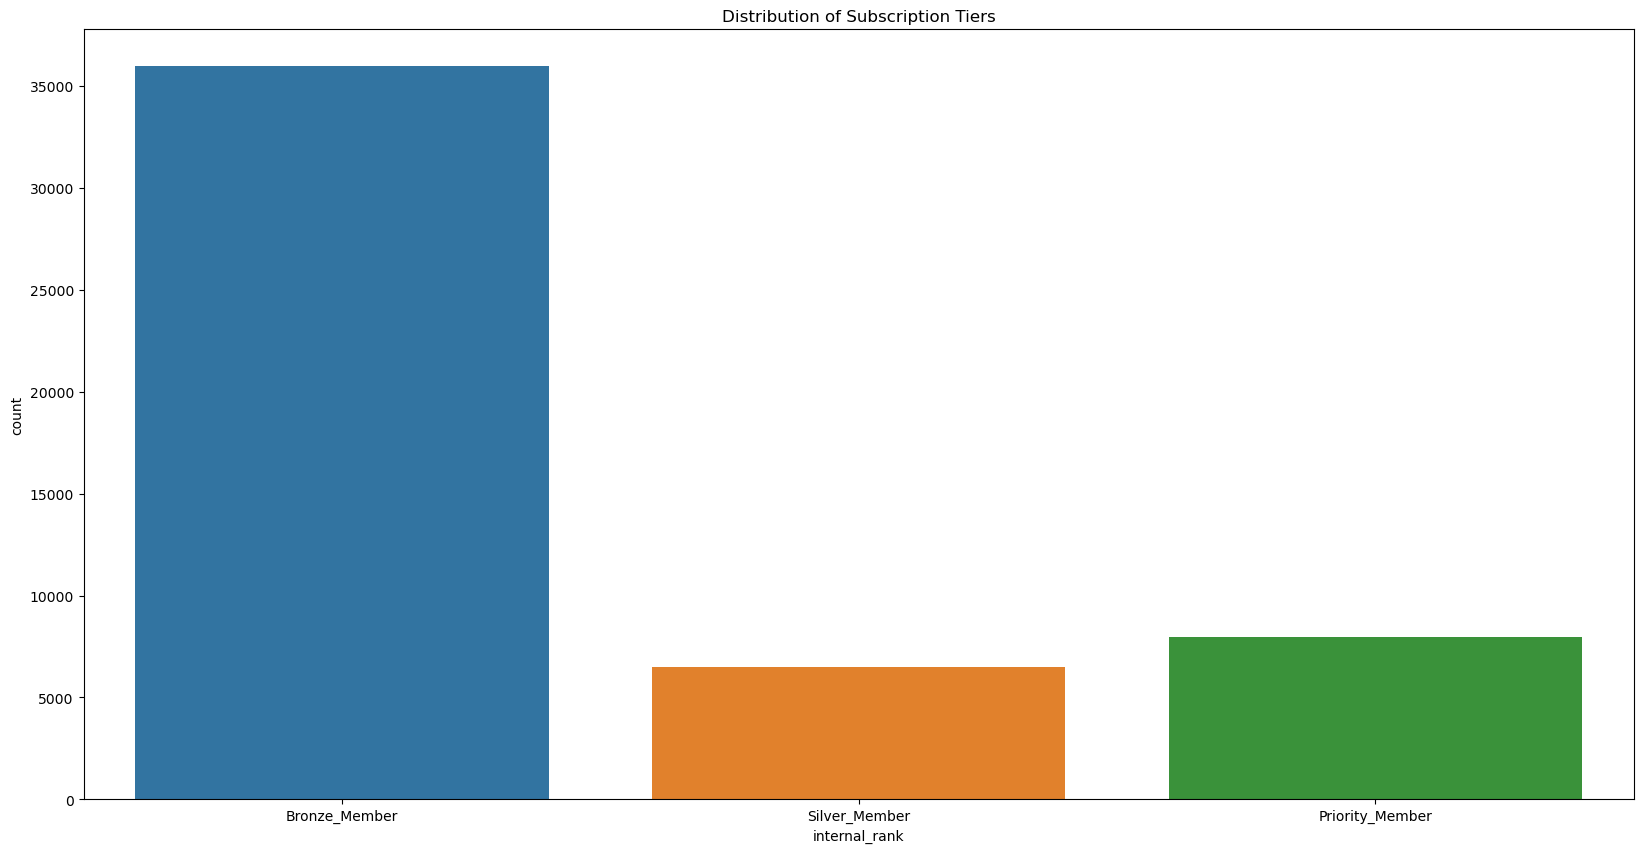

In [247]:
plt.figure(figsize=(20,10))
sns.countplot(x='internal_rank', data=final_df)
plt.title('Distribution of Subscription Tiers')

Observation:In subscription Bronze_Member has highest distribution

Text(0, 0.5, 'Count')

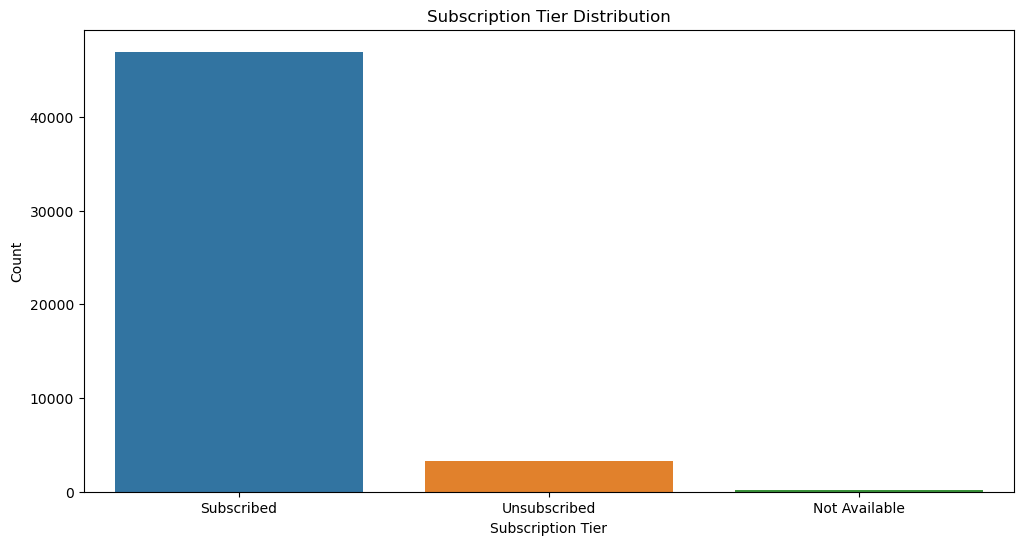

In [248]:
# Calculate subscription tier counts and percentages
tier_counts = final_df['sub_unsub'].value_counts()
tier_percentages = final_df['sub_unsub'].value_counts(normalize=True) * 100

# Visualize subscription tier distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=tier_counts.index, y=tier_counts.values)
plt.title('Subscription Tier Distribution')
plt.xlabel('Subscription Tier')
plt.ylabel('Count')

Text(0, 0.5, 'Streams per Month')

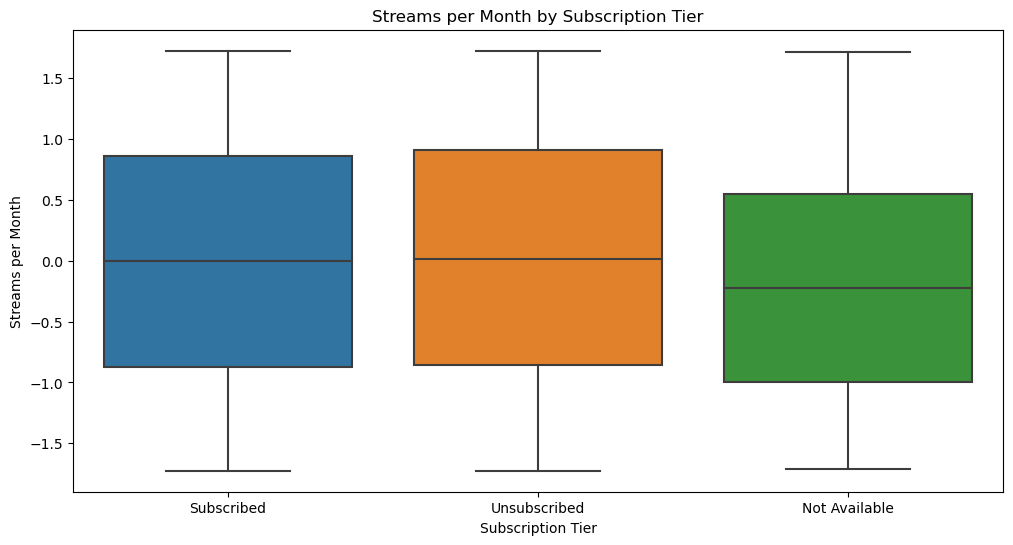

In [310]:
# Behavioral Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='sub_unsub', y='streams_per_month', data=final_df)
plt.title('Streams per Month by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('Streams per Month')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'WhaleCo First Tv Package (For K12 Students ONLY)'),
  Text(1, 0, 'WhaleCo Premium StockMarket Watch Package'),
  Text(2, 0, 'WhaleCo Kids Premium Sub'),
  Text(3, 0, 'WhaleCO 360 Office Premium'),
  Text(4, 0, 'WhaleCo Plus'),
  Text(5, 0, 'WhaleCo Outdoor & Adventure Advantage Package'),
  Text(6, 0, 'WhaleCo Exclusive'),
  Text(7, 0, 'WhaleCo Boost Cellular Plan & Internet'),
  Text(8, 0, 'WhaleCo Choice'),
  Text(9, 0, 'WhaleCo Now Unlimted Radio Package'),
  Text(10, 0, 'WhaleCo All-Access'),
  Text(11, 0, 'WhaleCo Prime'),
  Text(12, 0, 'WhaleCo Extra'),
  Text(13, 0, 'WhaleCo Other Sports Package'),
  Text(14, 0, 'WhaleCo VIP'),
  Text(15, 0, 'WhaleCo Unlimited Streaming'),
  Text(16, 0, 'WhaleCo Online Gaming Streaming Package'),
  Text(17, 0, 'WhaleCo Sunday Ticket (NFL)'),
  Text(18, 0, 'WhaleCo Pay as you Go Package'),
  Text(19, 0, 'WhaleCo Babies & Tot

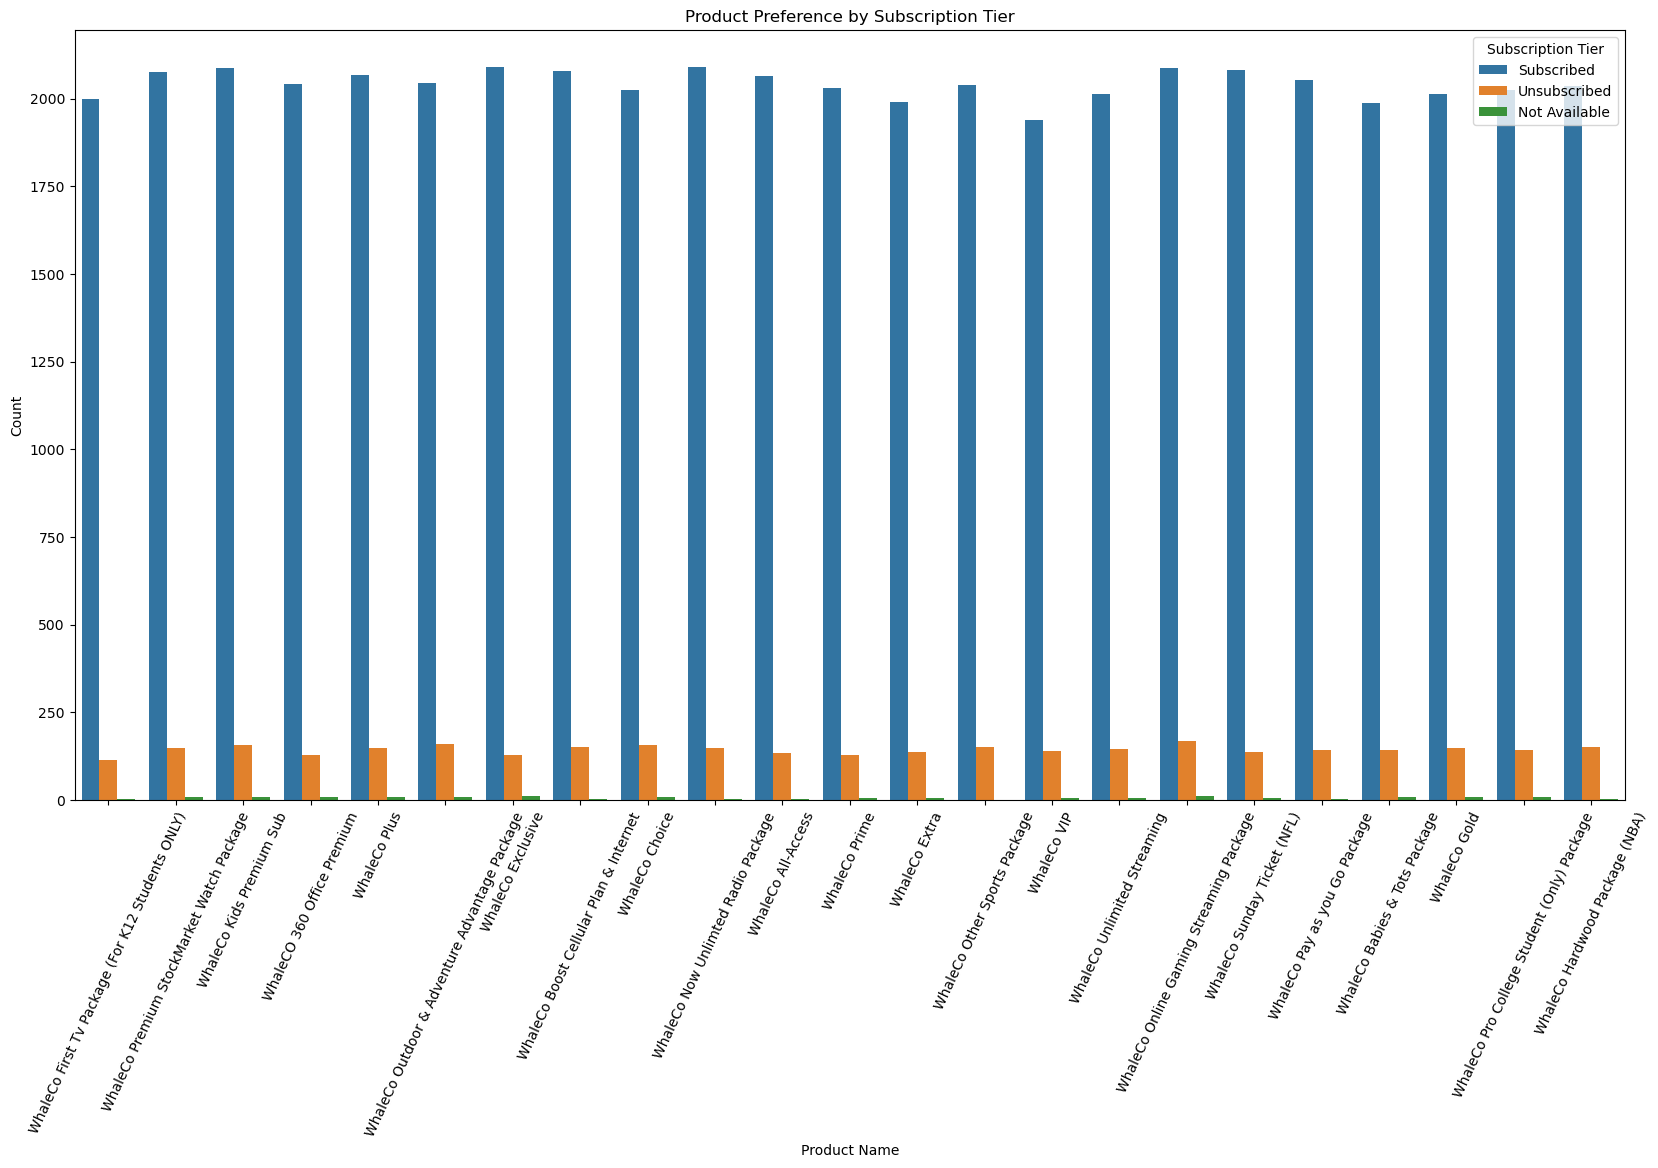

In [298]:
# Preference Analysis
plt.figure(figsize=(20,10))
sns.countplot(x='product_name', hue='sub_unsub', data=final_df)
plt.title('Product Preference by Subscription Tier')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.legend(title='Subscription Tier')
plt.xticks(rotation=65)

Text(0, 0.5, 'NPS Score')

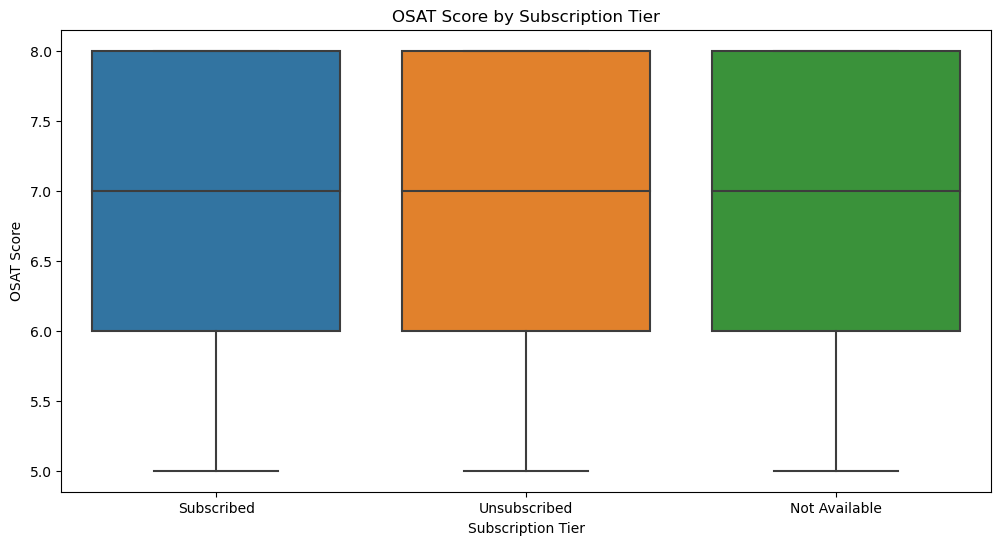

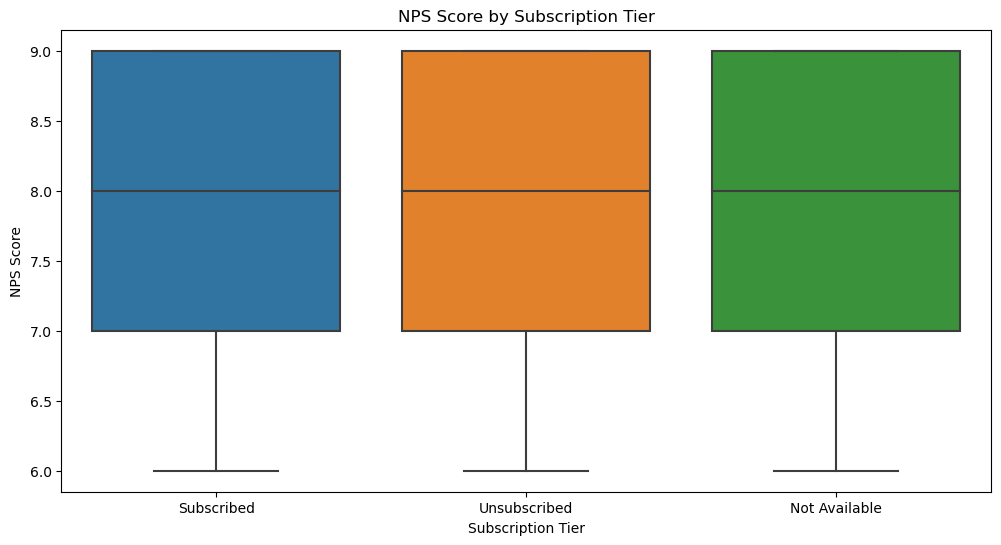

In [251]:
# Customer Satisfaction Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='sub_unsub', y='OSAT_Score', data=final_df)
plt.title('OSAT Score by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('OSAT Score')


plt.figure(figsize=(12, 6))
sns.boxplot(x='sub_unsub', y='NPS_Score', data=final_df)
plt.title('NPS Score by Subscription Tier')
plt.xlabel('Subscription Tier')
plt.ylabel('NPS Score')

Task-4.Churn Analysis

In [252]:
 #Investigate customer churn by calculating the churn rate and identifying factors that may contribute to customers unsubscribing from the service
# Calculate churn rate
total_customers = final_df['customer_id'].nunique()
churned_customers = final_df[final_df['sub_unsub'] == 'Unsubscribed']['customer_id'].nunique()
churn_rate = (churned_customers / total_customers) * 100

print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 6.48%


Text(0, 0.5, 'Found Salary')

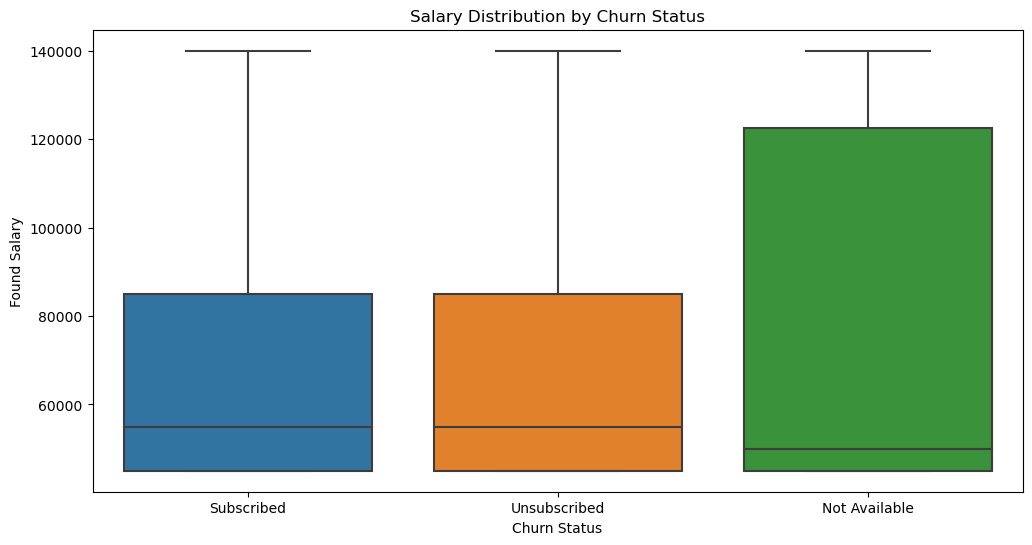

In [253]:
plt.figure(figsize=(12, 6))#displaying the factors
sns.boxplot(x='sub_unsub', y='found_salary', data=final_df)
plt.title('Salary Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Found Salary')

Text(0, 0.5, 'Price ')

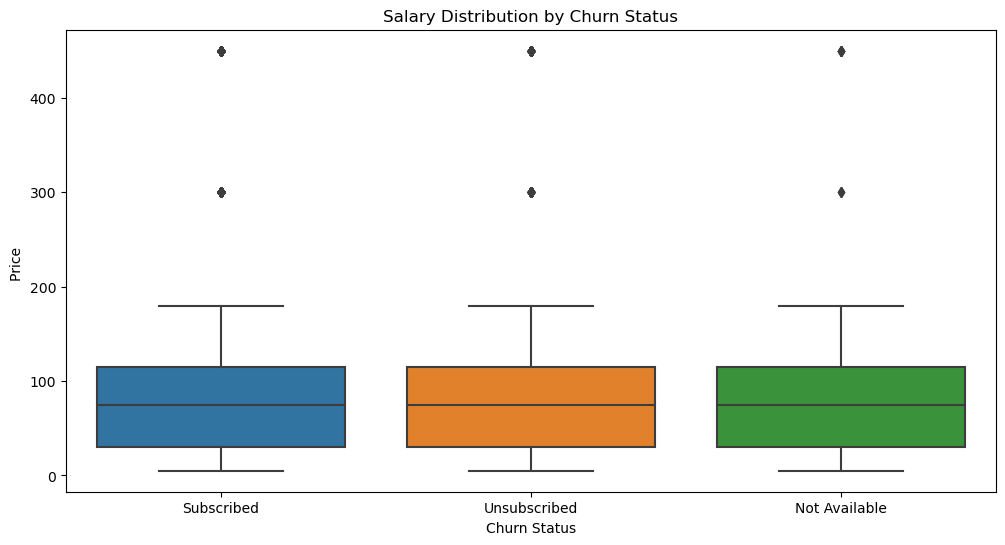

In [254]:
plt.figure(figsize=(12, 6))#displaying the factors
sns.boxplot(x='sub_unsub', y='Price ', data=final_df)
plt.title('Salary Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Price ')

In [255]:
package_performance = final_df.groupby('product_name').mean()#average engagement metrics by packages
package_performance 

,found_salary,active_months,OSAT_Score,NPS_Score,streams_per_month,hours_viewed,Price,Index
product_name,,,,,,,,
WhaleCO 360 Office Premium,70342.371324,7.335478,6.957261,7.948529,152.469669,83.491870,45.0,2.0
WhaleCo All-Access,69779.545455,7.388636,6.925455,7.931270,149.799454,84.251084,300.0,10.0
WhaleCo Babies & Tots Package,70072.497661,7.381197,6.919083,7.963050,151.562734,85.924672,75.0,3.0
WhaleCo Boost Cellular Plan & Internet,70438.675022,7.329006,6.917189,7.950761,148.473590,82.886216,80.0,11.0
WhaleCo Choice,69837.899543,7.378082,6.959361,7.960274,151.329374,82.903151,25.0,19.0
WhaleCo Exclusive,69236.111111,7.444892,6.926523,7.980287,150.082885,82.251047,10.0,21.0
WhaleCo Extra,69767.932489,7.245195,6.921707,7.949836,148.768293,84.415495,35.0,20.0
WhaleCo First Tv Package (For K12 Students ONLY),69175.330813,7.308129,6.922023,7.943762,153.640019,82.240091,100.0,22.0
WhaleCo Gold,70626.439429,7.219254,6.962690,7.898204,152.982036,82.639969,95.0,13.0


In [297]:
Products_name=final_df.product_name.value_counts().index #to check  index of product name
Products_name

Index(['WhaleCo Online Gaming Streaming Package', 'WhaleCo Kids Premium Sub',
       'WhaleCo Now Unlimted Radio Package',
       'WhaleCo Boost Cellular Plan & Internet', 'WhaleCo Exclusive',
       'WhaleCo Premium StockMarket Watch Package', 'WhaleCo Plus',
       'WhaleCo Sunday Ticket (NFL)',
       'WhaleCo Outdoor & Adventure Advantage Package', 'WhaleCo All-Access',
       'WhaleCo Pay as you Go Package', 'WhaleCo Hardwood Package (NBA)',
       'WhaleCo Other Sports Package', 'WhaleCo Choice',
       'WhaleCo Pro College Student (Only) Package',
       'WhaleCO 360 Office Premium', 'WhaleCo Gold', 'WhaleCo Prime',
       'WhaleCo Unlimited Streaming', 'WhaleCo Babies & Tots Package',
       'WhaleCo Extra', 'WhaleCo First Tv Package (For K12 Students ONLY)',
       'WhaleCo VIP'],
      dtype='object')

In [257]:
Package_value=final_df['product_name'].value_counts().values #to check value of product name
Package_value

array([2266, 2250, 2242, 2234, 2232, 2231, 2224, 2224, 2211, 2200, 2199,
       2192, 2191, 2190, 2176, 2176, 2171, 2164, 2162, 2138, 2133, 2116,
       2084], dtype=int64)

([<matplotlib.patches.Wedge at 0x24092ece850>,
 [Text(0.5440847895016822, 0.9560186932444943, 'WhaleCo Online Gaming Streaming Package'),
  Text(-1.0999315382033232, -0.012272378158760703, 'WhaleCo Kids Premium Sub'),
  Text(0.5547169475999614, -0.9498889977494117, 'WhaleCo Now Unlimted Radio Package')],
 [Text(0.29677352154637204, 0.5214647417697241, '33.53%'),
  Text(-0.5999626572018125, -0.00669402445023311, '33.29%'),
  Text(0.3025728805090698, -0.5181212714996791, '33.18%')])

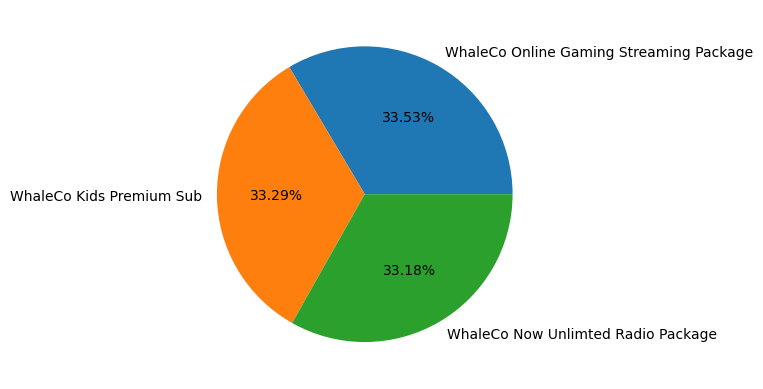

In [305]:
#top 3 Products which Streaming Packages more
plt.pie(Package_value[:3], labels=Products_name[:3], autopct='%1.2f%%')


# Model Training and Algorithm

In [276]:
from sklearn.model_selection import train_test_split# importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [277]:
final_df.columns

Index(['customer_id', 'State', 'Occupation', 'found_salary', 'internal_rank',
       'sub_unsub', 'active_months', 'ord_number', 'product_name',
       'OSAT_Score', 'NPS_Score', 'streams_per_month', 'hours_viewed',
       'internal_accounts', 'Price ', 'Index'],
      dtype='object')

In [278]:
X = pd.get_dummies(final_df[['State','Occupation','found_salary']])#independent features
y = final_df['sub_unsub']#dependent features

# Spliting  the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [280]:
# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [282]:
# Makeing predictions
y_pred = model.predict(X_test)

In [283]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9284864114263043
Classification Report:


C:\Users\ARPITA SINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

Not Available       0.00      0.00      0.00        31
   Subscribed       0.93      1.00      0.96      9361
 Unsubscribed       0.00      0.00      0.00       690

     accuracy                           0.93     10082
    macro avg       0.31      0.33      0.32     10082
 weighted avg       0.86      0.93      0.89     10082



C:\Users\ARPITA SINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARPITA SINGH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation:The logistic regression model shows a promising 93% accuracy in predicting whether customers are subscribed. This aligns with our goal of understanding customer behavior. While it performs well for 'Subscribed' customers, it could be improved for predicting 'Not Available' and 'Unsubscribed' categories, which are crucial for our retention strategies.

Text(0.5, 1.0, 'Confusion Matrix')

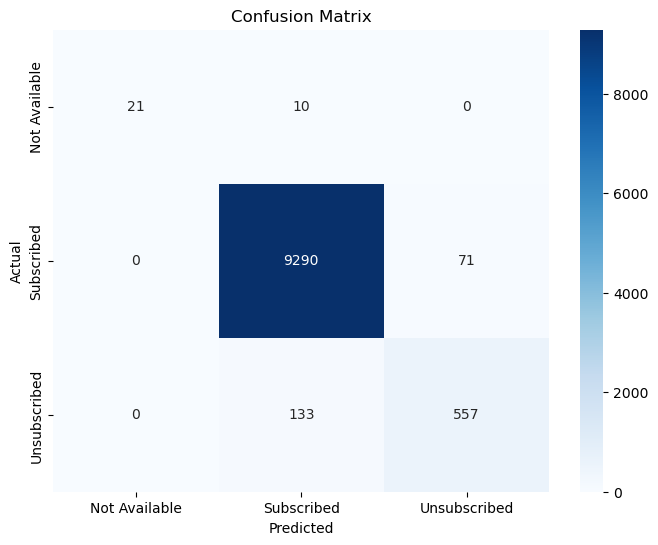

In [303]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
# Create a heatmap to display cinfusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')